# Interpretar fronteras no lineales

In [32]:
from sklearn.datasets import make_circles, make_blobs

In [14]:
X, Y = make_circles(100, factor = .1, noise = .1)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [16]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la funcion de decision para una clasificacion en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generaremos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], ylim[1], 30)
    yy = np.linspace(xlim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representaremos las fronteras y los margenes de SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors = "black")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [17]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model=SVC(kernel="linear", C = 1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

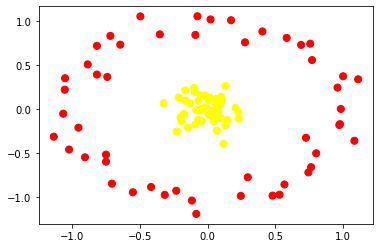

In [18]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

[[-0.49712538  1.05828582]
 [-0.75070727 -0.51491396]
 [-0.41799116 -0.88300379]
 [-0.70719295 -0.84480052]
 [-0.23223597 -0.92549508]
 [ 0.97581982 -0.1679917 ]
 [-1.05478274  0.22418177]
 [-0.55233948 -0.94315512]
 [ 0.47886036 -0.98144331]
 [ 0.76965598  0.5609916 ]
 [ 0.9575547   0.24783773]
 [-0.81770633  0.39644726]
 [-0.95401906 -0.20764238]
 [-0.64537403  0.73650641]
 [-0.81753437  0.72257001]
 [-0.88568594  0.51182114]
 [ 1.11002388  0.34262922]
 [ 0.99878319  0.3766595 ]
 [ 0.56619356 -0.85421401]
 [ 0.98218864  0.00504257]
 [-1.05268503  0.35451808]
 [-1.13588604 -0.31067088]
 [ 0.27518709  0.76274161]
 [ 0.17194206  1.01431185]
 [-0.35335914  0.85361381]
 [-0.31722879 -0.97270103]
 [ 0.29543995 -0.77268022]
 [ 0.9710581  -0.17745197]
 [-1.06652562 -0.04891238]
 [-0.71845992  0.83650592]
 [-0.75058142 -0.59498839]
 [ 0.68899998  0.73371868]
 [ 1.0824355  -0.35704724]
 [-0.74125962  0.36941839]
 [-0.08458292 -1.18947418]
 [ 0.75647711  0.74757642]
 [ 0.74238793 -0.71672006]
 

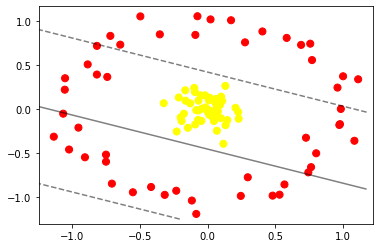

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [21]:
r = np.exp(-(X**2).sum(1))
r

array([0.98937021, 0.2548443 , 0.92813793, 0.43661749, 0.99090692,
       0.99604742, 0.38503837, 0.89046672, 0.9514403 , 0.29706337,
       0.96966937, 0.94687295, 0.9855163 , 0.4023332 , 0.93791954,
       0.97443004, 0.37514393, 0.96404975, 0.93861685, 0.31260212,
       0.98196747, 0.30281885, 0.99924157, 0.99278121, 0.30345006,
       0.40370054, 0.37593668, 0.43787838, 0.38547932, 0.38329539,
       0.98090545, 0.98996448, 0.30407836, 0.89542144, 0.99518335,
       0.35119963, 0.99815188, 0.25935751, 0.31999809, 0.97251731,
       0.96270642, 0.96477194, 0.34984792, 0.38108991, 0.93692975,
       0.29117557, 0.24988524, 0.51814368, 0.34701315, 0.42591341,
       0.99221532, 0.99386595, 0.35106587, 0.97990075, 0.50443338,
       0.37740249, 0.99230356, 0.31986082, 0.29643514, 0.9584728 ,
       0.39956307, 0.9327136 , 0.36310469, 0.27276372, 0.98081782,
       0.98029586, 0.50361874, 0.24123033, 0.96727076, 0.99914169,
       0.32266904, 0.34478733, 0.95286388, 0.3270162 , 0.97878

In [22]:
from mpl_toolkits import mplot3d

In [25]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [26]:
from ipywidgets import interact, fixed

In [28]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.00906482,  0.10297825],
       [-0.49712538,  1.05828582],
       [-0.16575401,  0.21702656],
       [-0.75070727, -0.51491396],
       [ 0.03582762, -0.08860616],
       [ 0.01181371, -0.06181304],
       [-0.41799116, -0.88300379],
       [-0.22921125, -0.25193602],
       [ 0.13168251, -0.18010566],
       [-0.70719295, -0.84480052],
       [ 0.09897358,  0.14492877],
       [-0.19283304, -0.13193094],
       [-0.06814256,  0.09973068],
       [-0.23223597, -0.92549508],
       [-0.21381167,  0.13555692],
       [-0.01956736,  0.15974876],
       [ 0.97581982, -0.1679917 ],
       [-0.16371851,  0.09903854],
       [ 0.22814174, -0.10629801],
       [-1.05478274,  0.22418177],
       [ 0.06385655,  0.11882524],
       [-0.55233948, -0.94315512],
       [-0.01770556,  0.02110056],
       [-0.08465593, -0.00885153],
       [ 0.47886036, -0.98144331],
       [ 0.76965598,  0.5609916 ],
       [ 0.9575547 ,  0.24783773],
       [

In [29]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

[[-0.75070727 -0.51491396]
 [-0.23223597 -0.92549508]
 [ 0.27518709  0.76274161]
 [ 0.29543995 -0.77268022]
 [-0.74125962  0.36941839]
 [ 0.72505469 -0.32261518]
 [-0.32485781  0.07020107]
 [ 0.1300231   0.26725111]
 [ 0.11559636 -0.39127714]]


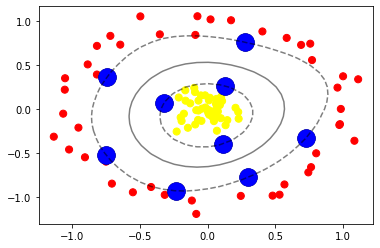

In [31]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

# Ajustar los parametros de SVM

In [43]:
X, Y = make_blobs(n_samples = 100, centers= 2, random_state = 0, cluster_std = 1.2)

[[-8.90728186e-02  1.92683157e+00]
 [ 1.53506501e+00  2.46029490e+00]
 [ 1.03118030e+00  4.07916671e+00]
 [ 5.11477898e-01  3.94102403e+00]
 [ 5.58775499e-01  4.49140609e+00]
 [ 1.69317541e-01  3.87232353e+00]
 [ 1.16220699e+00  4.75758235e+00]
 [ 6.02407040e-01  4.37118574e+00]
 [ 1.50890596e+00  4.70419652e+00]
 [ 1.05609075e+00  4.66675360e+00]
 [ 2.39080556e+00  4.08787752e+00]
 [ 2.34355090e+00  2.82199634e+00]
 [-2.81993480e-01  2.59976580e+00]
 [ 1.45908005e+00  3.48201522e+00]
 [ 3.69997563e+00  2.55854852e+00]
 [ 3.23605092e+00  2.68647645e+00]
 [ 2.11637618e+00  4.12215868e+00]
 [-6.86865005e-02  3.60916773e+00]
 [ 3.21733967e+00  3.13105387e+00]
 [ 2.01359352e+00  3.41318930e+00]
 [ 1.35195132e+00  3.27887244e+00]
 [ 1.85117875e+00  4.45856682e+00]
 [ 4.94540093e-04  2.23224820e+00]
 [ 2.15083566e-01  3.86849793e+00]
 [ 3.64687460e-01  3.77809817e+00]
 [ 1.18918145e+00  3.82165020e+00]
 [ 1.88951535e+00  4.44979735e+00]
 [ 3.63303913e-01  2.88702871e+00]
 [ 2.76916497e+00  4

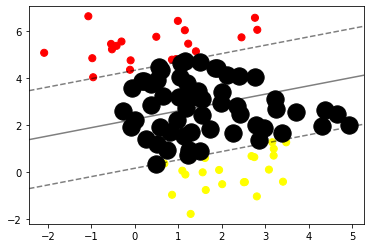

In [44]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=0.01)
model.fit(X,Y)
plt_svc(model)

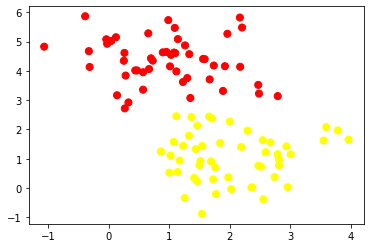

In [45]:
X, Y = make_blobs(n_samples = 100, centers= 2, random_state = 0, cluster_std = 0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]
 [1.36628697 2.42571562]]
[[0.26604148 2.71915015]
 [1.34880003 3.07479238]
 [1.88779063 3.31592667]
 [0.13742771 3.16777298]
 [2.79207378 3.14029479]
 [2.48279064 3.22558008]
 [2.47031647 3.52196502]
 [1.66781904 3.71005531]
 [0.32575305 2.92276125]
 [0.56762597 3.35928158]
 [3.59362114 2.08207549]
 [1.46361712 2.13207534]
 [2.29385806 1.95877238]
 [1.70714468 2.37707464]
 [2.00067424 2.26833784]
 [1.1167688  2.45256061]
 [1.65684156 2.4412893 ]
 [1.36628697 2.42571562]
 [1.32500974 1.79127669]
 [1.07491911 1.57315404]]


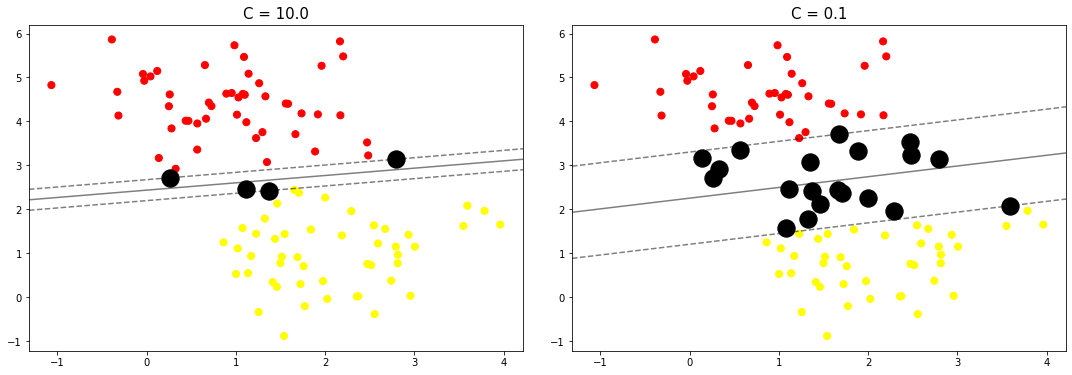

In [46]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)